In [20]:
import control

import numpy as np
import matplotlib.pyplot as plt

from sympy.abc import t, s
from sympy import symbols, simplify, expand
from sympy.series import limit
from sympy import matrices
from sympy.integrals import integrate

# Problem 10.8

## Part a

Real PD:

 
$G(s) = k_c \left(\frac{1 + \tau_D s}{1 + \alpha \tau_D s}\right)$

$E(s)=\frac{1}{s}$

$U(s)=k_c\left(\frac{1+\tau_Ds}{s\left(1+\alpha\tau_Ds\right)}\right)$

$U(s)=k_c\left(\frac{1}{s}+\frac{\tau_D\left(1-\alpha\right)}{\left(1+\alpha\tau_Ds\right)}\right)$ 

$u(t)=k_c\left(1+\frac{\tau_D\left(1-\alpha\right)}{\alpha\tau_D}\right)\exp\left(-\alpha^{-1}\frac{t}{\tau_D}\right)$

Real PD response:

$$\frac{u(t)}{k_c}=1+\frac{\left(1-\alpha\right)}{\alpha}\exp\left(-\alpha^{-1}\frac{t}{\tau_D}\right)$$

Ideal PD:


$G(s)=k_c\left(1+\tau_Ds\right)$

$U(s)=k_c\left(\frac{1}{s}+\tau_D\right)$

Ideal PD response:

$$\frac{u(t)}{k_c}=1+\delta\left(t\right)$$

### Simulation

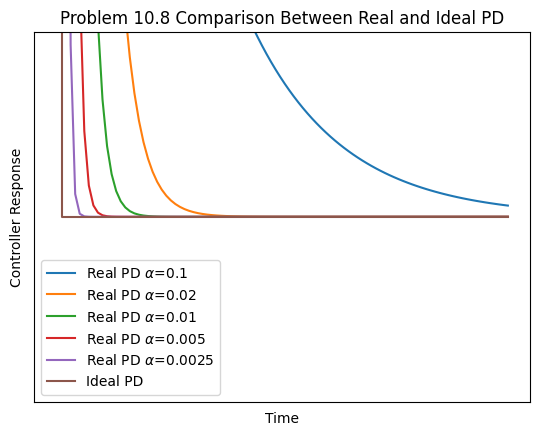

In [2]:
alpha = [0.1, 0.02, 0.01, 0.005, 0.005/2]

def real_pd(t, alpha):
    return 1 + (1 - alpha) / alpha * np.exp(-t / alpha)

t_values = np.linspace(0, .5, 100)

for a in alpha:
    plt.plot(t_values, real_pd(t_values, a), label=r"Real PD $\alpha$="+f"{a}")

ideal_pd_response = np.ones(t_values.shape[0])
ideal_pd_response[0] = 1e300

plt.plot(t_values, ideal_pd_response, label="Ideal PD")

plt.ylim([0, 2])
plt.xlabel("Time")
plt.ylabel("Controller Response")
plt.title("Problem 10.8 Comparison Between Real and Ideal PD")
plt.xticks([], [])
plt.yticks([], [])
plt.legend()

The closer that $\alpha$ is to zero, the closer closer that the Real PD is to the Ideal PD. The smaller the $\alpha$ value, the faster that the Real PD responds to the error.

## Part B

Real PD:

$$G(s)=k_c\left(\frac{1+\tau_Ds}{1+\alpha\tau_Ds}\right)$$

Ideal PD:

$$G(s)=k_c\left(1+\tau_Ds\right)$$

### Bode Diagrams

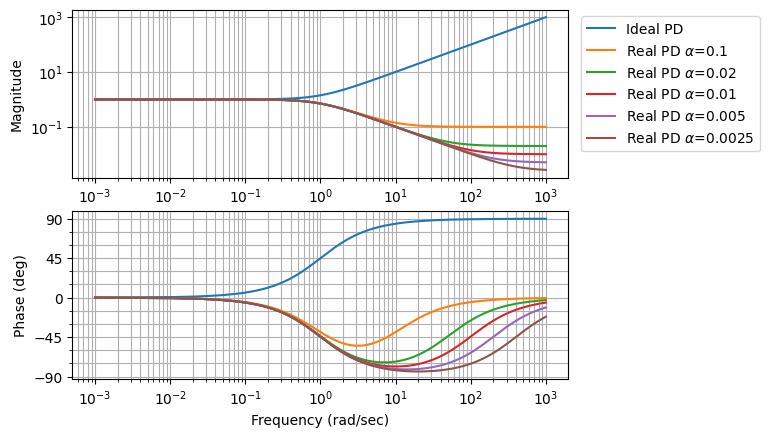

In [3]:
alpha = [0.1, 0.02, 0.01, 0.005, 0.005/2]

ideal_pd = control.tf([1, 1], [1])

w = np.linspace(1e-3, 1e3, int(1e5))

mag, phase, omega = control.bode_plot(ideal_pd, omega=w, wrap_phase=True, label="Ideal PD")

for a in alpha:
    real_pd = control.tf([a, 1], [1, 1])
    mag, phase, omega = control.bode_plot(real_pd, omega=w, label=r"Real PD $\alpha$="+f"{a}")

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 2.2))

The real PD and ideal PD have the same cutoff frequency. In that way, the real PD approximates the ideal PD. However, the real PD and ideal PD do not respond the same way to the same frequencies above the cutoff frequency. 

# Problem 10.10

## Part A

### State space models:

$$\frac{de_I}{dt}=e$$

$$\frac{de_F}{dt}=\frac{e-e_F}{\tau_F}$$

$$u=k_c\left(e+\frac{e_I}{\tau_I}+\frac{\tau_D}{\tau_F}\left(e-e_F\right)\right)$$

## Part B

$$\frac{d}{dt}\begin{bmatrix}e_I\\ e_F\end{bmatrix}=\begin{bmatrix}0&0\\0&\frac{-1}{\tau_F}\end{bmatrix}\begin{bmatrix}e_I\\ e_F\end{bmatrix}+\begin{bmatrix}1\\\frac{1}{\tau_F}\end{bmatrix}e$$

$$u=\begin{bmatrix}\frac{k_c}{\tau_I}&-\frac{k_c\tau_D}{\tau_F}\end{bmatrix}\begin{bmatrix}e_I\\ e_F\end{bmatrix}+k_c\left(1+\frac{\tau_D}{\tau_F}\right)e$$

### Define the state-space system in matrix form

In [25]:
tau_F, tau_I, k_c, tau_D, T_s = symbols('tau_F, tau_I, k_c, tau_D, T_s')

A = matrices.Matrix([
    [0, 0],
    [0, -1/tau_F]
])
B = matrices.Matrix([
    [1],
    [1/tau_F]
])
C = matrices.Matrix([
    [k_c/tau_I, -k_c*tau_D/tau_F]
])
D = k_c * (1 + tau_D/tau_F)

### Compute $A_d$ symbolically

$$A_d=e^{AT_s}$$

In [33]:
A_d = (A * T_s).exp()
A_d

Matrix([
[1,               0],
[0, exp(-T_s/tau_F)]])

### Compute $B_d$ symbolically

$$B_d=\int_0^{T_s}e^{At'}Bdt'$$

In [30]:
B_d = integrate((A*t).exp() * B, (t, 0, T_s))
B_d

Matrix([
[                T_s],
[1 - exp(-T_s/tau_F)]])

# Problem 11.2

## Part A

$Y(s)\frac{1-M(s)Q(s)+Q(s)G(s)}{1-M(s)Q(s)}=\frac{Q(s)G(s)}{1-M(s)Q(s)}Y_{sp}(s)+W(s)G'(s)$

$$Y(s)=\frac{Q(s)G(s)}{1-M(s)Q(s)+Q(s)G(s)}Y_{sp}(s)+\frac{\left(1-M(s)Q(s)\right)G'(s)}{1-M(s)Q(s)+Q(s)G(s)}W(s)$$

## Part B

$$Y(s)=\frac{C_E(s)G(s)}{\left(1+C_E(s)G(s)-C_Y(s)G(s)\right)}Y_{sp}(s)+\frac{W(s)}{\left(1+C_E(s)G(s)-C_Y(s)G(s)\right)}G'(s)$$

## Part C

$$Y(s)=\frac{G'(s)+G(s)G_{ff}(s)}{1+G_c(s)G(s)}W(s)+\frac{G_c(s)G(s)}{1+G_c(s)G(s)}Y_{sp}(s)$$

# Problem 11.8

## Part A

Feedback loop transfer function:

$$G(s)=\frac{G_cG_p}{1+G_cG_p}$$

Process transfer function:

$$G_p(s)=\frac{k_p}{\tau^2s^2+2\zeta\tau s+1}$$

Controller transfer function:

$$G_c(s)=k_c\left(\frac{1+\tau_Ds}{1+\alpha\tau_Ds}\right)$$

### Define feedback transfer function symbolically

In [4]:
tau, zeta, tau_D, alpha = symbols('tau, zeta, tau_D, alpha')
k_c, k_p = symbols('k_c, k_p')

G_p = k_p / (tau**2 * s**2 + 2 * zeta * tau * s + 1)
G_c = k_c * (1 + tau_D * s) / (1 + alpha * tau_D * s)

G_feedback = simplify(G_c * G_p / (1 + G_c * G_p))

G_feedback

k_c*k_p*(s*tau_D + 1)/(k_c*k_p*(s*tau_D + 1) + (alpha*s*tau_D + 1)*(s**2*tau**2 + 2*s*tau*zeta + 1))

## Part B

Find offset by Final Value Theorem:

$$\lim_{s\rightarrow0^+}sY(s)=\lim_{t\rightarrow\infty}y(t)$$

$G(s)=\frac{G_cG_p}{1+G_cG_p}$

$Y(s)=G(s)Y_{sp}(s)$

In deviation form:

$y_{sp}(t)=1$

$Y_{sp}(s)=\frac{1}{s}$

$Y(s)=\frac{G(s)}{s}$

$sY(s)=s\frac{G(s)}{s}=G(s)$

Offset is $y_{sp}(t)-y(t)$ at $\infty$

$y(t)=\lim_{s\rightarrow0^+}G(s)$

Offset: 

$$1-\lim_{s\rightarrow0^+}G(s)$$

In [5]:
simplify(1 - limit(G_feedback, s, 0))

1/(k_c*k_p + 1)